<a href="https://colab.research.google.com/github/turchynbohdan/Test-task1-Registration-Login-Logout-forms-/blob/master/ls14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

170498071/170498071 [==============================] - 2s 0us/step


<ipython-input-2-06baae282b69>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


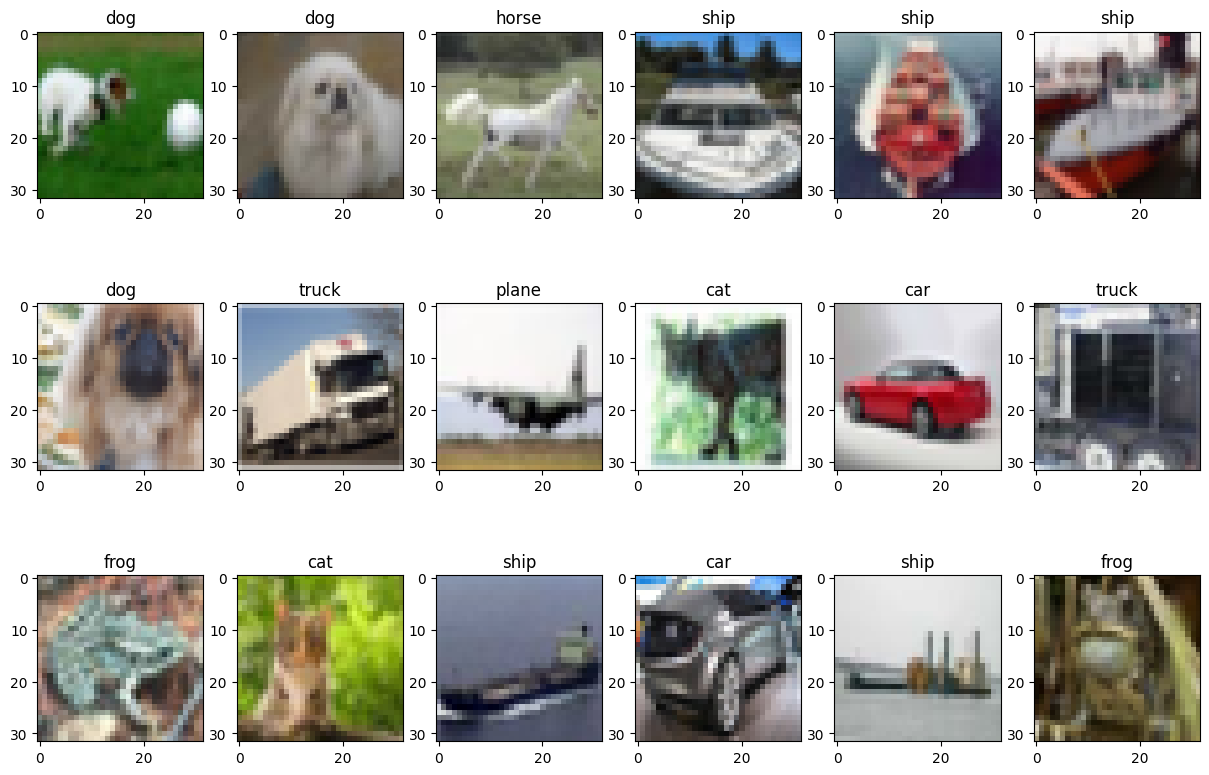

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

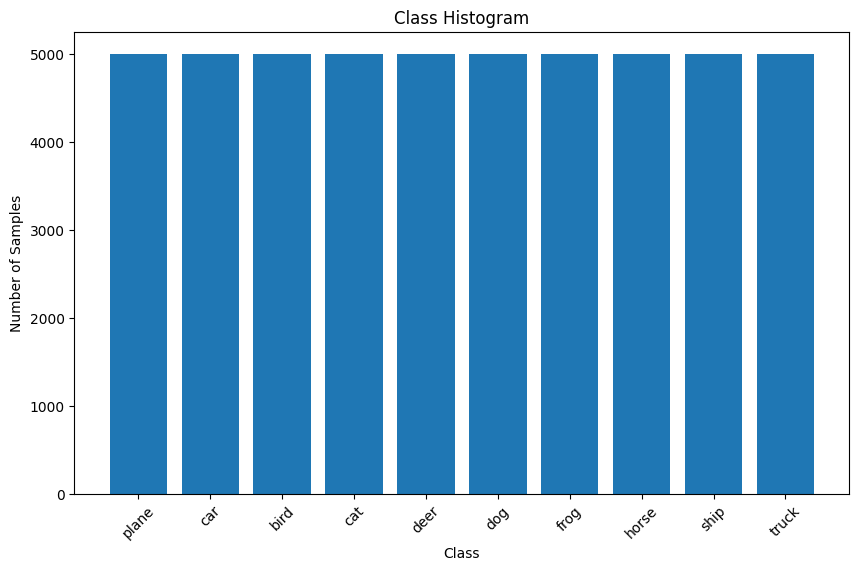

In [3]:
from collections import Counter

# Compute class histogram
class_counts = Counter(y_train.flatten())

# Visualize class histogram
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Histogram')
plt.xticks(range(num_classes), [classes[i] for i in range(num_classes)], rotation=45)
plt.show()

In [4]:
import tensorflow as tf

# Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Print dataset information
print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


In [5]:
from tensorflow.keras import layers, models

# Model description
model = models.Sequential([
    # Input layer
    layers.InputLayer(input_shape=(size, size, 3)),

    # First convolutional block
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.35),

    # Second convolutional block
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),

    # Third convolutional block
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.55),

    layers.Flatten(),
    # Fully connected layer
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                        

In [6]:
# Set number of epochs and batch size
epochs = 25
batch_size = 128

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test))

Epoch 1/25
391/391 [==============================] - 23s 27ms/step - loss: 2.0317 - accuracy: 0.3725 - val_loss: 2.0509 - val_accuracy: 0.2398
Epoch 2/25
391/391 [==============================] - 8s 22ms/step - loss: 1.3500 - accuracy: 0.5450 - val_loss: 1.1360 - val_accuracy: 0.5931
Epoch 3/25
391/391 [==============================] - 8s 20ms/step - loss: 1.1143 - accuracy: 0.6182 - val_loss: 0.9754 - val_accuracy: 0.6631
Epoch 4/25
391/391 [==============================] - 9s 23ms/step - loss: 0.9480 - accuracy: 0.6658 - val_loss: 0.8624 - val_accuracy: 0.6964
Epoch 5/25
391/391 [==============================] - 11s 28ms/step - loss: 0.8465 - accuracy: 0.7038 - val_loss: 0.7246 - val_accuracy: 0.7493
Epoch 6/25
391/391 [==============================] - 8s 21ms/step - loss: 0.7737 - accuracy: 0.7276 - val_loss: 0.7554 - val_accuracy: 0.7410
Epoch 7/25
391/391 [==============================] - 11s 28ms/step - loss: 0.7208 - accuracy: 0.7461 - val_loss: 0.6645 - val_accuracy: 0.7

Train Acc      0.8499400019645691
Validation Acc 0.8342000246047974


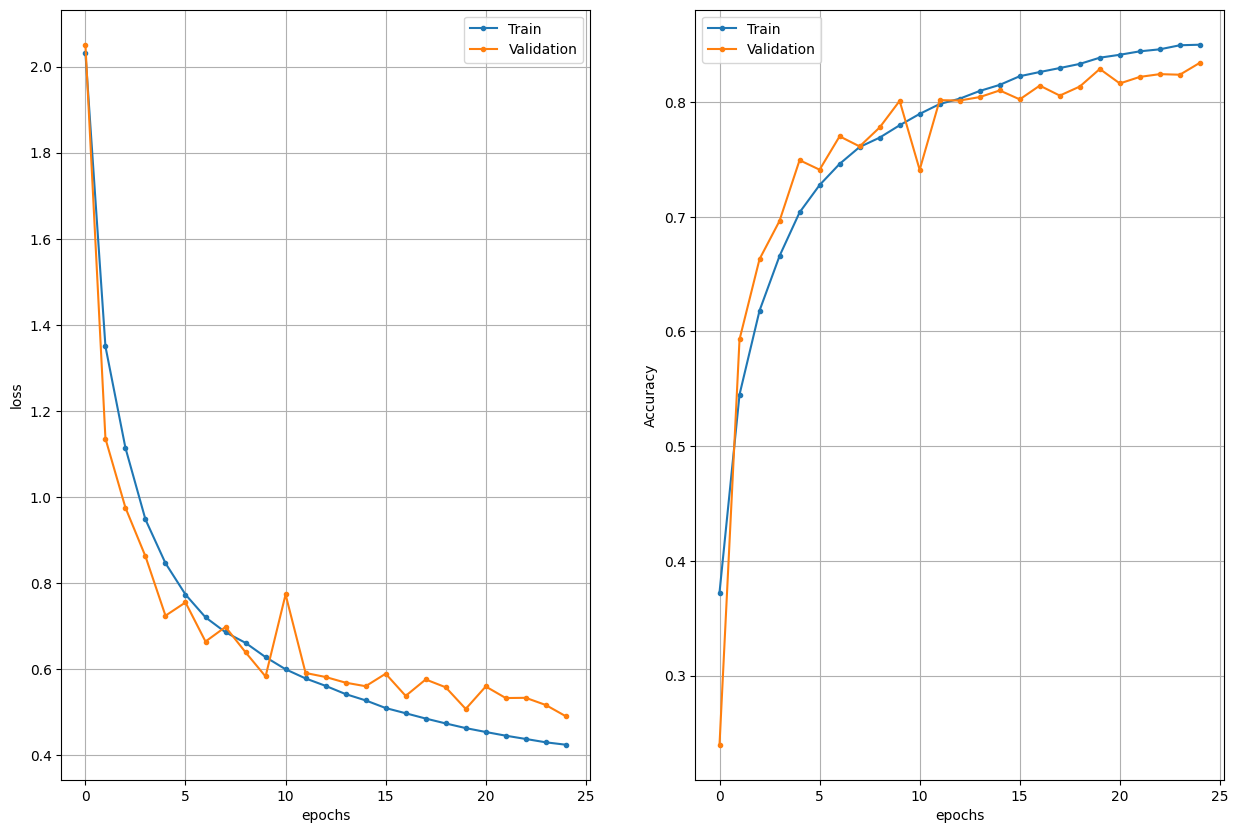

In [7]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])

In [8]:
# Compute predictions for the test set
predictions = model.predict(x_test)

# Convert predictions from one-hot encoded to categorical labels
y_pred = np.argmax(predictions, axis=1)

# Convert true labels from one-hot encoded to categorical labels
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


In [9]:
from sklearn.metrics import accuracy_score

# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    # Get indices of samples belonging to the current class
    class_indices = (y_true == class_id)

    # Compute accuracy for the current class
    class_accuracy = accuracy_score(y_true[class_indices], y_pred[class_indices])

    # Print the accuracy
    print(f"{class_name}: {class_accuracy}")

plane: 0.857
car: 0.924
bird: 0.74
cat: 0.746
deer: 0.791
dog: 0.789
frog: 0.885
horse: 0.841
ship: 0.882
truck: 0.887


In [10]:

# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.4910 - accuracy: 0.8342
Test loss   0.49101904034614563
Test metric 0.8342000246047974


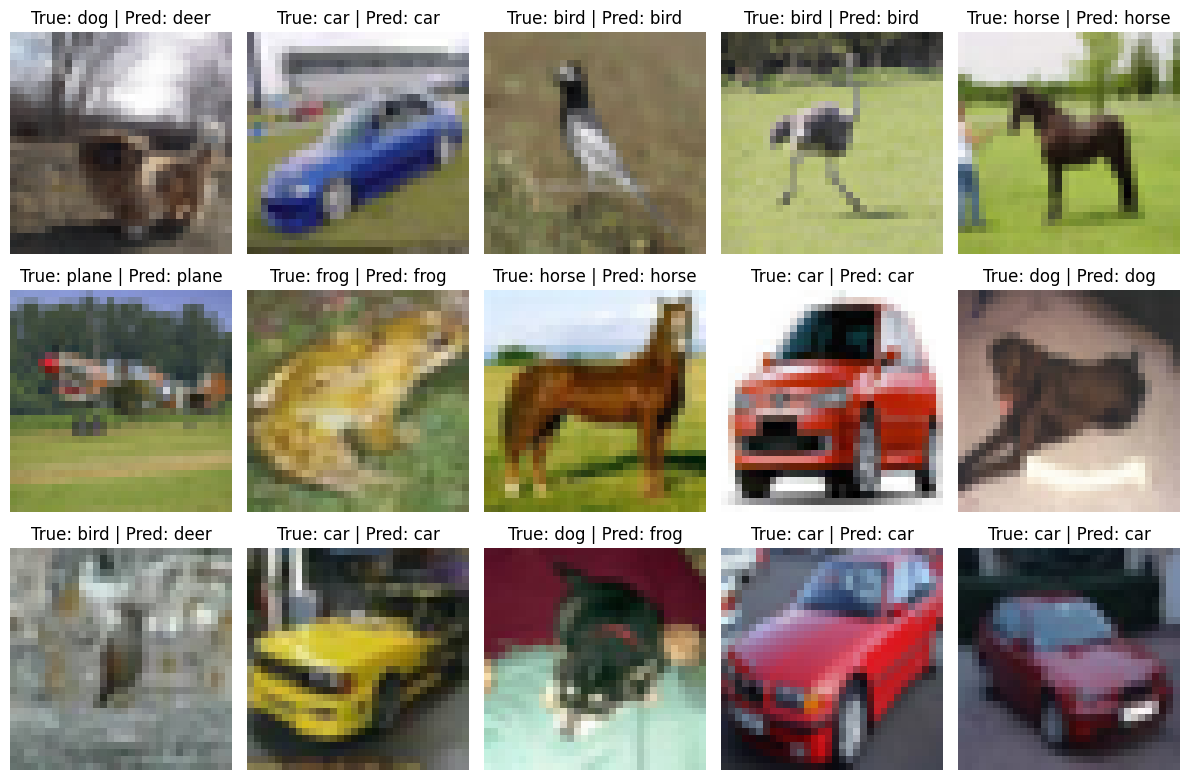

In [11]:
# Show random samples
plt.figure(figsize=(12, 8))
for ii in range(15):
    # Pick a random sample index
    idx = np.random.randint(0, len(x_test))

    # Show the results
    plt.subplot(3, 5, ii+1)
    plt.imshow(x_test[idx])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
# What is the overall accuracy of the classifier?
overall_accuracy = accuracy_score(y_true, y_pred)

print("overall_accuracy: {:.2f}%".format(overall_accuracy * 100))

overall_accuracy: 83.42%


In [21]:
from tensorflow.keras import layers, models

# Model description
model = models.Sequential([
    # Input layer
    layers.InputLayer(input_shape=(size, size, 3)),

    # First convolutional block
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.35),

    # Second convolutional block
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),

    # Third convolutional block
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.55),

    layers.Flatten(),
    # Fully connected layer
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_24 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_25 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                      

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation configuration
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data augmentation generator on the training data
train_datagen.fit(x_train)

# Set number of epochs and batch size
epochs = 25
batch_size = 128

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/25
390/390 [==============================] - 39s 91ms/step - loss: 2.1480 - accuracy: 0.3331 - val_loss: 3.0082 - val_accuracy: 0.1672
Epoch 2/25
390/390 [==============================] - 32s 81ms/step - loss: 1.5887 - accuracy: 0.4627 - val_loss: 1.7671 - val_accuracy: 0.4396
Epoch 3/25
390/390 [==============================] - 31s 79ms/step - loss: 1.3910 - accuracy: 0.5305 - val_loss: 1.3820 - val_accuracy: 0.5486
Epoch 4/25
390/390 [==============================] - 32s 81ms/step - loss: 1.2289 - accuracy: 0.5792 - val_loss: 1.1350 - val_accuracy: 0.6102
Epoch 5/25
390/390 [==============================] - 31s 79ms/step - loss: 1.1256 - accuracy: 0.6091 - val_loss: 1.1370 - val_accuracy: 0.6085
Epoch 6/25
390/390 [==============================] - 32s 81ms/step - loss: 1.0313 - accuracy: 0.6383 - val_loss: 1.0057 - val_accuracy: 0.6551
Epoch 7/25
390/390 [==============================] - 30s 78ms/step - loss: 0.9726 - accuracy: 0.6603 - val_loss: 0.9987 - val_accuracy:

In [17]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])

plane: 0.879
car: 0.931
bird: 0.725
cat: 0.649
deer: 0.813
dog: 0.881
frog: 0.865
horse: 0.865
ship: 0.911
truck: 0.922


In [18]:
# What is the overall accuracy of the classifier?
overall_accuracy = accuracy_score(y_true, y_pred)

print("overall_accuracy: {:.2f}%".format(overall_accuracy * 100))

overall_accuracy: 84.41%
